# Python Implementation
## Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal, stats
from statsmodels.tsa.stattools import acf, pacf, ccf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
def generate_white_noise(n=500, mean=0, std=1, seed=None):
    """
    Generate white noise series

    Parameters:
    -----------
    n : int
        Number of observations
    mean : float
        Mean of the process
    std : float
        Standard deviation
    seed : int
        Random seed for reproducibility
    """
    if seed:
        np.random.seed(seed)

    wn = np.random.normal(mean, std, n)
    return wn

# Example
wn = generate_white_noise(n=500, seed=42)

In [ ]:
def moving_average(wn, weights=None):
    """
    Apply moving average filter

    Parameters:
    -----------
    wn : array
        Input series (typically white noise)
    weights : array
        MA weights (default: 3-point average)
    """
    if weights is None:
        weights = np.array([1/3, 1/3, 1/3])

    # Use convolution for MA
    ma = np.convolve(wn, weights, mode='same')
    return ma

# Example: 3-point MA
ma_series = moving_average(wn)

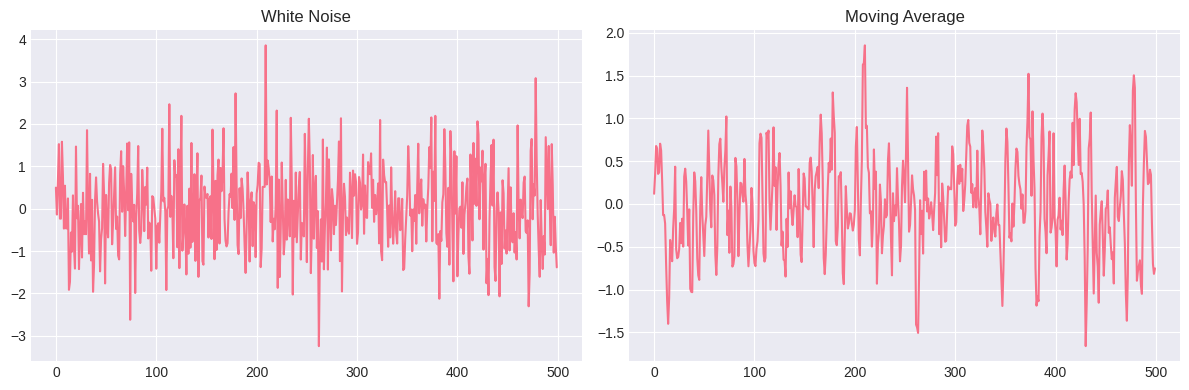

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot white noise in the first subplot
axes[0].plot(wn)
axes[0].set_title('White Noise')

# The second subplot is ready for your plot
axes[1].plot(ma_series)
axes[1].set_title('Moving Average')

# Adjust spacing between subplots

plt.tight_layout()
plt.show()

In [ ]:
def generate_ar(n=500, phi=[1, -0.9], sigma=1, seed=None):
    """
    Generate AR(p) process

    Parameters:
    -----------
    n : int
        Number of observations
    phi : list
        AR coefficients [1, phi_1, phi_2, ...]
    sigma : float
        Noise standard deviation
    """
    if seed:
        np.random.seed(seed)

    # Generate white noise
    wn = np.random.normal(0, sigma, n + 50)  # Extra for burn-in

    # Generate AR process using lfilter
    ar_series = signal.lfilter([1], phi, wn)

    # Remove burn-in
    return ar_series[50:]

# Example: AR(2)
ar2 = generate_ar(n=500, phi=[1, 1, -0.9], seed=42)

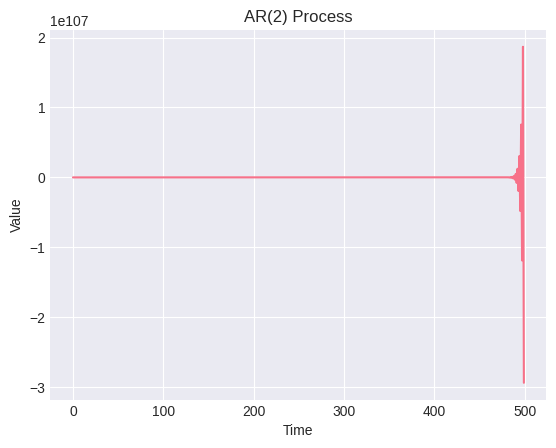

In [ ]:
plt.plot(ar2)
plt.title('AR(2) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
def random_walk(n=200, drift=0, sigma=1, x0=0, seed=None):
    """
    Generate random walk with drift

    Parameters:
    -----------
    n : int
        Number of observations
    drift : float
        Drift parameter δ
    sigma : float
        Standard deviation of innovations
    x0 : float
        Initial value
    """
    if seed:
        np.random.seed(seed)

    # Generate innovations
    wn = np.random.normal(0, sigma, n)

    # Cumulative sum
    rw = x0 + drift * np.arange(1, n+1) + np.cumsum(wn)

    return rw

# Example
rw = random_walk(n=200, drift=0.2, seed=42)

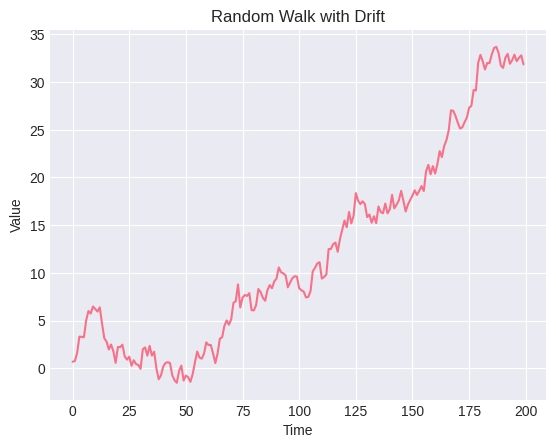

In [ ]:
plt.plot(rw)
plt.title('Random Walk with Drift')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
def signal_plus_noise(n=200, A=2, omega=1/50, phi=0.6*np.pi,
                      sigma=1, seed=None):
    """
    Generate signal plus noise model

    Parameters:
    -----------
    n : int
        Number of observations
    A : float
        Amplitude
    omega : float
        Frequency
    phi : float
        Phase shift
    sigma : float
        Noise standard deviation
    """
    if seed:
        np.random.seed(seed)

    t = np.arange(1, n+1)
    signal = A * np.cos(2 * np.pi * omega * t + phi)
    noise = np.random.normal(0, sigma, n)

    return signal + noise, signal, noise

# Example
x, signal, noise = signal_plus_noise(n=200, sigma=1, seed=42)

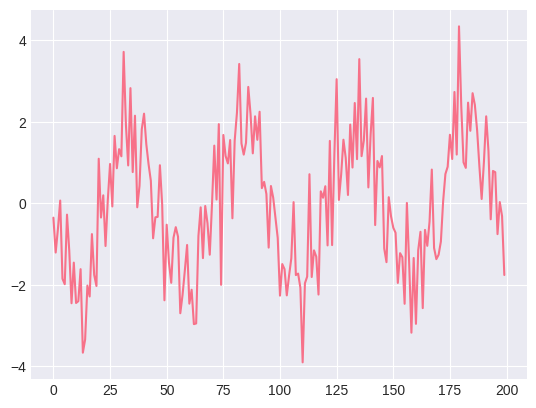

In [ ]:
plt.plot(x)

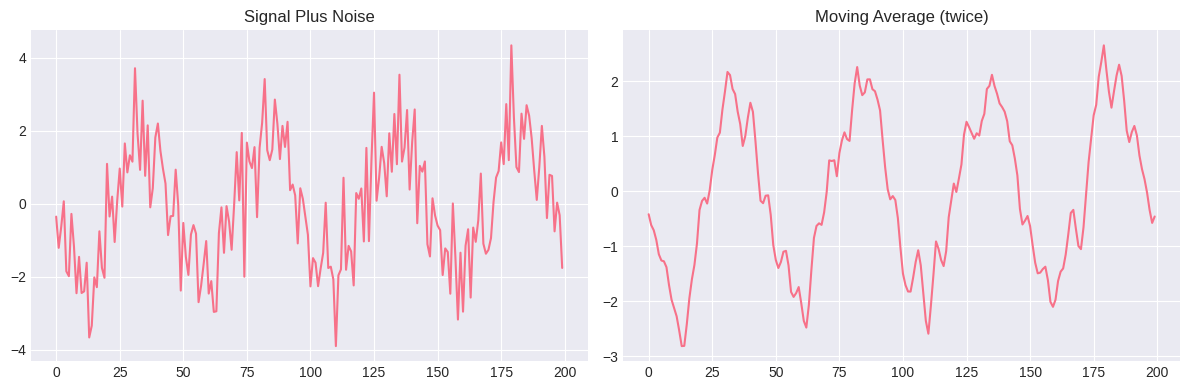

In [ ]:
suavisado = moving_average(moving_average(x))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot white noise in the first subplot
axes[0].plot(x)
axes[0].set_title('Signal Plus Noise')

# The second subplot is ready for your plot
axes[1].plot(suavisado)
axes[1].set_title('Moving Average (twice)')

# Adjust spacing between subplots

plt.tight_layout()
plt.show()

In [ ]:
def compute_acf(x, nlags=40, alpha=0.05):
    """
    Compute sample ACF with confidence intervals

    Parameters:
    -----------
    x : array
        Time series data
    nlags : int
        Number of lags
    alpha : float
        Significance level for confidence interval

    Returns:
    --------
    acf_vals : array
        ACF values
    confint : array
        Confidence intervals
    """
    from statsmodels.tsa.stattools import acf as sm_acf

    acf_vals = sm_acf(x, nlags=nlags, fft=True)

    # Confidence interval (approximate)
    ci = stats.norm.ppf(1 - alpha/2) / np.sqrt(len(x))

    return acf_vals, ci

# Example
wn = generate_white_noise(500, seed=42)
acf_vals, ci = compute_acf(wn, nlags=5)

In [ ]:
print("ACF values for white noise:")
print(f"Lag 0: {acf_vals[0]:.4f}  <- ALWAYS 1.0")
print(f"Lag 1: {acf_vals[1]:.4f}  <- CORRELATION with the previus")
print(f"Lag 2: {acf_vals[2]:.4f}  <- CORRELATION with 2 steps behind")
print(f"Lag 3: {acf_vals[3]:.4f}")
print(f"Lag 4: {acf_vals[4]:.4f}")
print(f"Lag 5: {acf_vals[5]:.4f}")

# Confidence Intervals
ci = stats.norm.ppf(0.975) / np.sqrt(500)  # ≈ 0.0877
print(f"\n95% Confidence bands: ±{ci:.4f}")
print("For white noise, we expect that ACF ≈ 0 for all lags > 0")

ACF values for white noise:
Lag 0: 1.0000  <- ALWAYS 1.0
Lag 1: -0.0040  <- CORRELATION with the previus
Lag 2: -0.0085  <- CORRELATION with 2 steps behind
Lag 3: 0.0134
Lag 4: -0.0758
Lag 5: 0.0320

95% Confidence bands: ±0.0877
For white noise, we expect that ACF ≈ 0 for all lags > 0


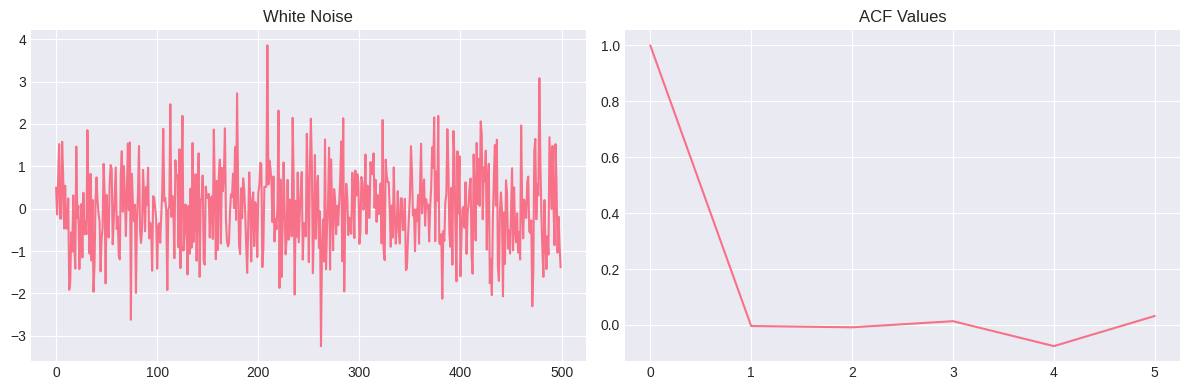

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot white noise in the first subplot
axes[0].plot(wn)
axes[0].set_title('White Noise')

# The second subplot is ready for your plot
axes[1].plot(acf_vals)
axes[1].set_title('ACF Values')

# Adjust spacing between subplots

plt.tight_layout()
plt.show()

In [ ]:
acf_vals, ci = compute_acf(x, nlags=10)

print("ACF values for signal plus noise:")
print(f"Lag 0: {acf_vals[0]:.4f}  <- ALWAYS 1.0")
print(f"Lag 1: {acf_vals[1]:.4f}  <- CORRELATION with the previus")
print(f"Lag 2: {acf_vals[2]:.4f}  <- CORRELATION with 2 steps behind")
print(f"Lag 3: {acf_vals[3]:.4f}")
print(f"Lag 4: {acf_vals[4]:.4f}")
print(f"Lag 5: {acf_vals[5]:.4f}")
print(f"Lag 6: {acf_vals[6]:.4f}")
print(f"Lag 7: {acf_vals[7]:.4f}")
print(f"Lag 8: {acf_vals[8]:.4f}")
print(f"Lag 9: {acf_vals[9]:.4f}")
print(f"Lag 10: {acf_vals[10]:.4f}")

# Confidence Intervals
ci = stats.norm.ppf(0.975) / np.sqrt(500)  # ≈ 0.0877
print(f"\n95% Confidence bands: ±{ci:.4f}")
print("""
In this case, for the signal plus noise we can observe that the values have
significantly high correlation up to at least lag 6 (first six values > 0.5).
This strong and persistent autocorrelation is due to the underlying sinusoidal
signal, which creates a cyclical pattern in the data. Unlike white noise, where
ACF ≈ 0 for lags > 0, this series shows slowly decaying correlation, indicating
predictable periodic behavior.
""")

ACF values for signal plus noise:
Lag 0: 1.0000  <- ALWAYS 1.0
Lag 1: 0.6507  <- CORRELATION with the previus
Lag 2: 0.6375  <- CORRELATION with 2 steps behind
Lag 3: 0.6246
Lag 4: 0.5481
Lag 5: 0.5761
Lag 6: 0.5031
Lag 7: 0.4386
Lag 8: 0.3373
Lag 9: 0.2705
Lag 10: 0.1930

95% Confidence bands: ±0.0877

In this case, for the signal plus noise we can observe that the values have
significantly high correlation up to at least lag 6 (first six values > 0.5).
This strong and persistent autocorrelation is due to the underlying sinusoidal
signal, which creates a cyclical pattern in the data. Unlike white noise, where
ACF ≈ 0 for lags > 0, this series shows slowly decaying correlation, indicating
predictable periodic behavior.



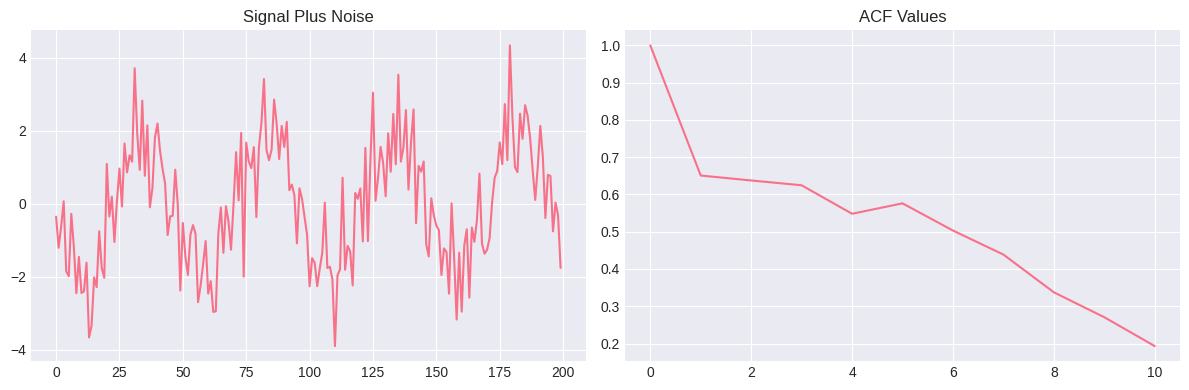

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot white noise in the first subplot
axes[0].plot(x)
axes[0].set_title('Signal Plus Noise')

# The second subplot is ready for your plot
axes[1].plot(acf_vals)
axes[1].set_title('ACF Values')

# Adjust spacing between subplots

plt.tight_layout()
plt.show()

In [ ]:
def compute_ccf(x, y, nlags=40):
    """
    Compute sample cross-correlation function

    Parameters:
    -----------
    x, y : arrays
        Two time series
    nlags : int
        Number of lags (both positive and negative)

    Returns:
    --------
    lags : array
        Lag values
    ccf_vals : array
        CCF values
    """
    # Standardize series
    x_std = (x - np.mean(x)) / np.std(x)
    y_std = (y - np.mean(y)) / np.std(y)

    # Compute cross-correlation
    ccf_vals = np.correlate(x_std, y_std, mode='full') / len(x)

    # Get lags
    lags = np.arange(-nlags, nlags + 1)
    mid = len(ccf_vals) // 2
    ccf_vals = ccf_vals[mid-nlags:mid+nlags+1]

    return lags, ccf_vals

# Example
x = generate_white_noise(500, seed=42)
y = generate_white_noise(500, seed=123)
lags, ccf_vals = compute_ccf(x, y, nlags=20)

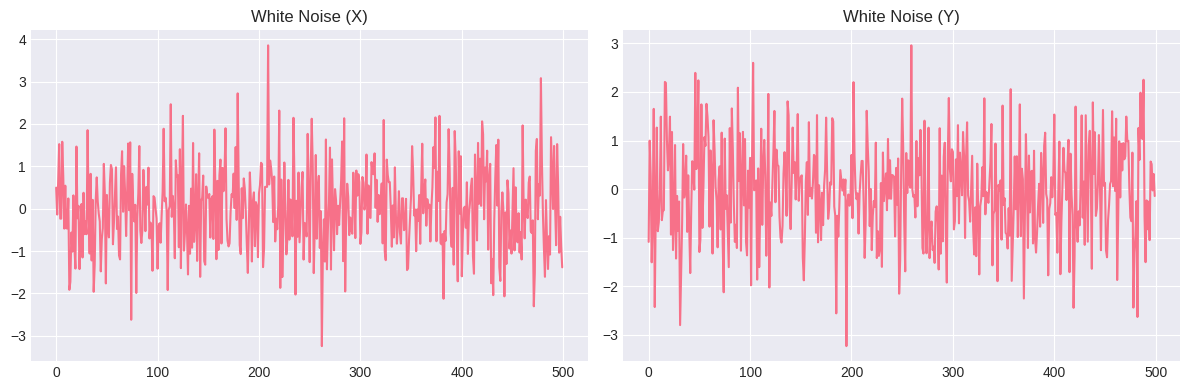

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot white noise in the first subplot
axes[0].plot(x)
axes[0].set_title('White Noise (X)')

# The second subplot is ready for your plot
axes[1].plot(y)
axes[1].set_title('White Noise (Y)')

# Adjust spacing between subplots

plt.tight_layout()
plt.show()

The above time series plots display **independent white noise** processes:
- **Left panel**: White Noise (X)
- **Right panel**: White Noise (Y)

### Observed Characteristics

1. **Random fluctuations** centered around zero
2. **Approximate range**: -3 to +4
3. **Erratic appearance**: No visible patterns, trends, or cycles
4. **Constant variability**: Amplitude of fluctuations remains similar throughout

### White Noise Properties

**Theoretical definition:**
```
X_t ~ WN(0, σ²)  implies:
    E[X_t] = 0           (zero mean)
    Var[X_t] = σ²        (constant variance)
    Cov[X_t, X_s] = 0    (no autocorrelation for t ≠ s)
```

**For two independent series X and Y:**
```
Cov[X_t, Y_s] = 0  for all t, s
```

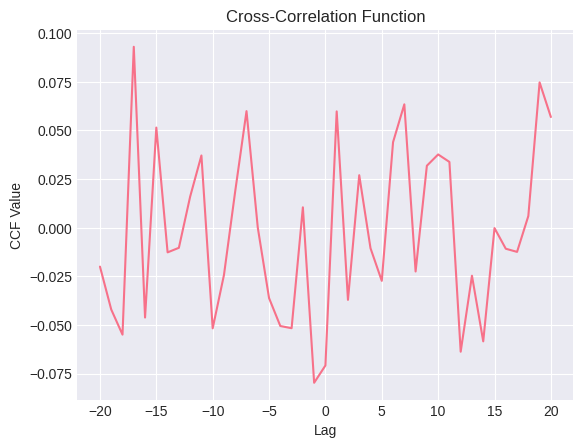

In [ ]:
plt.plot(lags, ccf_vals)
plt.title('Cross-Correlation Function')
plt.xlabel('Lag')
plt.ylabel('CCF Value')
plt.show()

# Analysis of Cross-Correlation Function and White Noise Series

### Definition

The **Cross-Correlation Function** measures the correlation between two different time series (X and Y) at various lags (time shifts).

**Mathematical representation:**
```
CCF(X, Y) at lag h = Correlation between X_t and Y_{t+h}
```

### Interpretation of the Graph

**Axis components:**

1. **X-axis (Lag)**: Ranges from -20 to +20
   - **Negative lag** (< 0): X leads Y (X is ahead in time)
   - **Lag = 0**: Contemporaneous correlation (same time point)
   - **Positive lag** (> 0): X lags Y (Y is ahead in time)

2. **Y-axis (CCF Value)**: Ranges from -0.075 to 0.100
   - Values near **0** indicate no significant correlation
   - Most values are within **±0.10**

### Observed Pattern

- Values fluctuate around zero
- **No dominant peak** at any specific lag
- Values are **relatively small** (< 0.10 in absolute value)
- All values fall within or very close to the confidence bands

**Statistical significance:**
```
Confidence bands: ±2/√n = ±2/√500 ≈ ±0.089
```

### Conclusion

The two white noise series show **no significant correlation at any lag**. This result is expected when both series are independently generated random processes. The absence of values exceeding the confidence bands confirms statistical independence between X and Y.

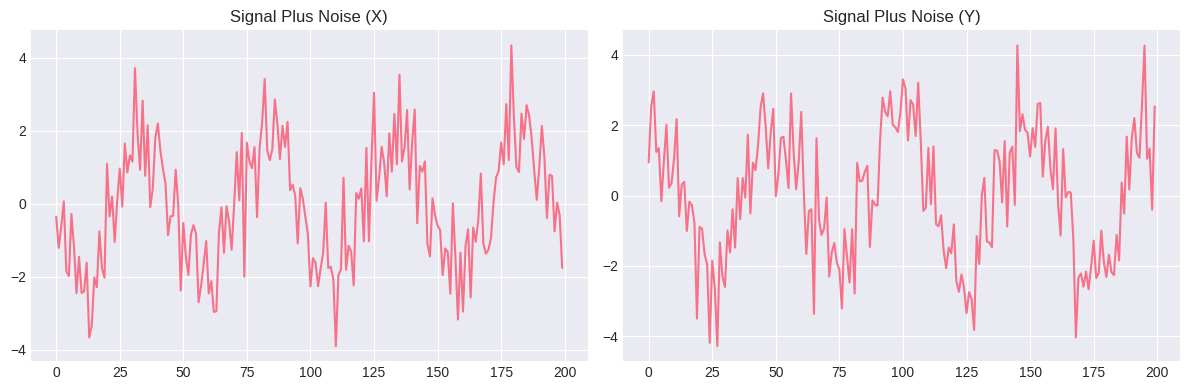

In [ ]:
x, signal, noise = signal_plus_noise(n=200, sigma=1, seed=42)
y, signal, noise = signal_plus_noise(n=200, sigma=1, phi=0*np.pi, seed=56)
lags, ccf_vals = compute_ccf(x, y, nlags=20)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot white noise in the first subplot
axes[0].plot(x)
axes[0].set_title('Signal Plus Noise (X)')

# The second subplot is ready for your plot
axes[1].plot(y)
axes[1].set_title('Signal Plus Noise (Y)')

# Adjust spacing between subplots

plt.tight_layout()
plt.show()


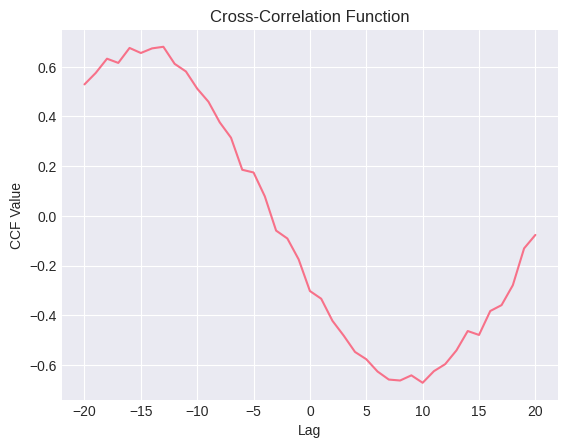

In [ ]:
plt.plot(lags, ccf_vals)
plt.title('Cross-Correlation Function')
plt.xlabel('Lag')
plt.ylabel('CCF Value')
plt.show()

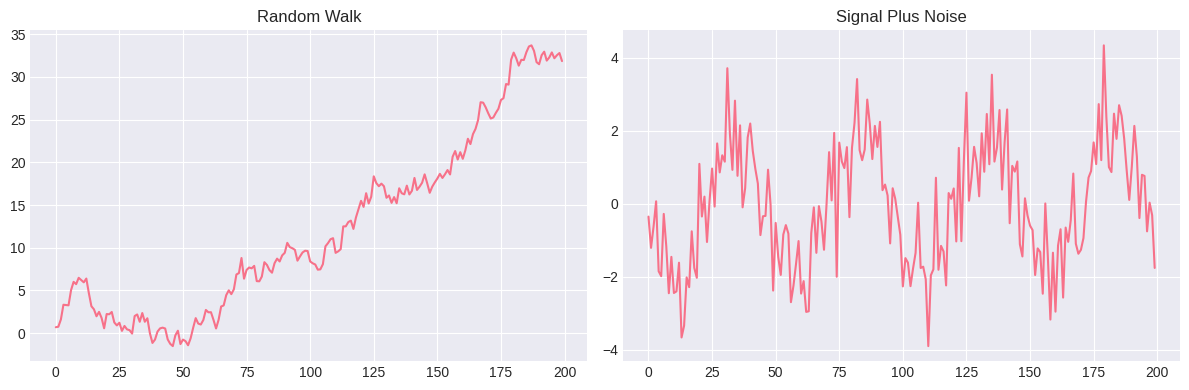

In [ ]:
rw = random_walk(n=200, drift=0.2, seed=42)
x, signal, noise = signal_plus_noise(n=200, sigma=1, seed=42)

lags, ccf_vals = compute_ccf(rw, x, nlags=20)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# Plot white noise in the first subplot
axes[0].plot(rw)
axes[0].set_title('Random Walk')

# The second subplot is ready for your plot
axes[1].plot(x)
axes[1].set_title('Signal Plus Noise')

# Adjust spacing between subplots

plt.tight_layout()
plt.show()

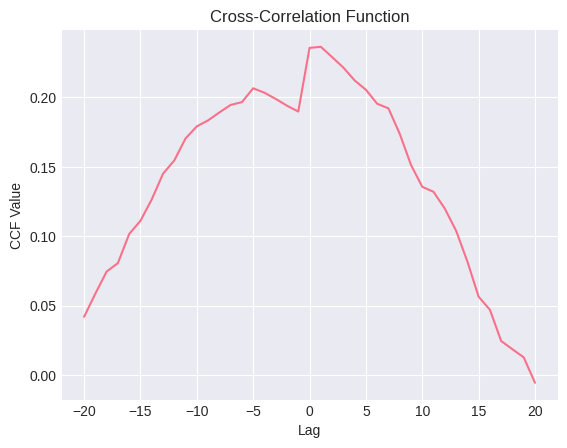

In [ ]:
plt.plot(lags, ccf_vals)
plt.title('Cross-Correlation Function')
plt.xlabel('Lag')
plt.ylabel('CCF Value')
plt.show()

---
# GIS data

In [ ]:
from matplotlib.patches import Circle, Rectangle
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
class GeoVisualizationDemo:
    """
    Demonstration class for geographical data visualization concepts
    """

    def __init__(self):
        self.fig = None
        self.ax = None

    def demonstrate_visual_variables(self):
        """
        Demonstrate the seven visual variables
        """
        fig, axes = plt.subplots(2, 4, figsize=(16, 8))
        fig.suptitle('Seven Visual Variables', fontsize=16, fontweight='bold')

        # Position
        ax = axes[0, 0]
        x = np.random.rand(20) * 10
        y = np.random.rand(20) * 10
        ax.scatter(x, y, s=100, c='blue', alpha=0.6)
        ax.set_title('Position')
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 10)

        # Shape
        ax = axes[0, 1]
        shapes = ['o', 's', '^', 'D', 'v', 'p', '*']
        for i, shape in enumerate(shapes):
            ax.scatter(i+1, 5, marker=shape, s=300, c='blue', alpha=0.6)
        ax.set_title('Shape')
        ax.set_xlim(0, 8)
        ax.set_ylim(0, 10)

        # Size
        ax = axes[0, 2]
        sizes = [50, 100, 200, 400, 800]
        for i, size in enumerate(sizes):
            ax.scatter(i+1, 5, s=size, c='blue', alpha=0.6)
        ax.set_title('Size')
        ax.set_xlim(0, 6)
        ax.set_ylim(0, 10)

        # Hue
        ax = axes[0, 3]
        colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']
        for i, color in enumerate(colors):
            ax.scatter(i+1, 5, s=300, c=color, alpha=0.6)
        ax.set_title('Hue')
        ax.set_xlim(0, 7)
        ax.set_ylim(0, 10)

        # Value
        ax = axes[1, 0]
        values = np.linspace(0.2, 1.0, 7)
        for i, val in enumerate(values):
            ax.scatter(i+1, 5, s=300, c=[(0, 0, val)], alpha=1.0)
        ax.set_title('Value (Darkness)')
        ax.set_xlim(0, 8)
        ax.set_ylim(0, 10)

        # Texture
        ax = axes[1, 1]
        patterns = ['/', '\\', '|', '-', '+', 'x', 'o']
        for i, pattern in enumerate(patterns):
            rect = Rectangle((i, 4), 0.8, 2, facecolor='blue',
                           edgecolor='black', hatch=pattern, alpha=0.6)
            ax.add_patch(rect)
        ax.set_title('Texture')
        ax.set_xlim(0, 7)
        ax.set_ylim(0, 10)

        # Orientation
        ax = axes[1, 2]
        angles = np.linspace(0, 360, 8, endpoint=False)
        for i, angle in enumerate(angles):
            ax.arrow(i+1, 5, 0.3*np.cos(np.radians(angle)),
                    0.3*np.sin(np.radians(angle)),
                    head_width=0.2, head_length=0.2, fc='blue', ec='blue')
        ax.set_title('Orientation')
        ax.set_xlim(0, 9)
        ax.set_ylim(0, 10)

        # Remove the empty subplot
        fig.delaxes(axes[1, 3])

        plt.tight_layout()
        return fig

    def demonstrate_classification_methods(self, data=None):
        """
        Demonstrate different classification methods
        """
        if data is None:
            # Generate sample data
            np.random.seed(42)
            data = np.concatenate([
                np.random.normal(20, 5, 30),
                np.random.normal(50, 10, 30),
                np.random.normal(80, 8, 30)
            ])

        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle('Classification Methods Comparison',
                     fontsize=14, fontweight='bold')

        # Equal Intervals
        ax = axes[0]
        n_classes = 5
        min_val, max_val = data.min(), data.max()
        interval = (max_val - min_val) / n_classes
        bins_equal = [min_val + i * interval for i in range(n_classes + 1)]
        ax.hist(data, bins=bins_equal, edgecolor='black', alpha=0.7)
        ax.set_title('Equal Intervals')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

        # Quantiles
        ax = axes[1]
        bins_quantile = np.percentile(data, np.linspace(0, 100, n_classes + 1))
        ax.hist(data, bins=bins_quantile, edgecolor='black', alpha=0.7)
        ax.set_title('Quantiles (Equal Count)')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

        # Natural Breaks (simplified - using jenks-like approach)
        ax = axes[2]
        # For demonstration, using quantiles as approximation
        # In practice, you'd use jenkspy or similar library
        bins_natural = np.percentile(data, [0, 15, 35, 60, 85, 100])
        ax.hist(data, bins=bins_natural, edgecolor='black', alpha=0.7)
        ax.set_title('Natural Breaks (Approximation)')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

        plt.tight_layout()
        return fig, bins_equal, bins_quantile, bins_natural

    def create_proportional_symbol_map(self):
        """
        Create a proportional symbol map example
        """
        # Generate sample city data
        np.random.seed(42)
        n_cities = 15

        cities = pd.DataFrame({
            'x': np.random.uniform(0, 100, n_cities),
            'y': np.random.uniform(0, 100, n_cities),
            'population': np.random.uniform(10000, 500000, n_cities)
        })

        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        fig.suptitle('Proportional Symbol Map', fontsize=14, fontweight='bold')

        # Incorrect: scaling by radius
        ax = axes[0]
        sizes_wrong = cities['population'] / 1000  # Direct scaling
        ax.scatter(cities['x'], cities['y'], s=sizes_wrong,
                  alpha=0.6, edgecolors='black', linewidths=1)
        ax.set_title('INCORRECT: Scaling by Radius')
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        ax.grid(True, alpha=0.3)

        # Correct: scaling by area
        ax = axes[1]
        sizes_correct = np.sqrt(cities['population'] / 1000)  # Area scaling
        scatter = ax.scatter(cities['x'], cities['y'], s=sizes_correct,
                           alpha=0.6, edgecolors='black', linewidths=1)
        ax.set_title('CORRECT: Scaling by Area')
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        ax.grid(True, alpha=0.3)

        # Add legend
        legend_sizes = [50000, 200000, 400000]
        legend_elements = [plt.scatter([], [], s=np.sqrt(size/1000),
                                      alpha=0.6, edgecolors='black',
                                      label=f'{size:,}')
                          for size in legend_sizes]
        ax.legend(handles=legend_elements, title='Population',
                 loc='upper right', frameon=True)

        plt.tight_layout()
        return fig

    def create_point_density_map(self):
        """
        Create a point density map example
        """
        # Generate sample regions with population
        np.random.seed(42)

        regions = [
            {'name': 'Region A', 'x': 25, 'y': 75, 'population': 50000},
            {'name': 'Region B', 'x': 75, 'y': 75, 'population': 120000},
            {'name': 'Region C', 'x': 25, 'y': 25, 'population': 80000},
            {'name': 'Region D', 'x': 75, 'y': 25, 'population': 30000}
        ]

        fig, ax = plt.subplots(figsize=(10, 10))
        fig.suptitle('Point Density Map (1 dot = 5,000 people)',
                     fontsize=14, fontweight='bold')

        # Draw region boundaries
        for region in regions:
            rect = Rectangle((region['x']-20, region['y']-20), 40, 40,
                           linewidth=2, edgecolor='black',
                           facecolor='lightgray', alpha=0.3)
            ax.add_patch(rect)
            ax.text(region['x'], region['y']+23, region['name'],
                   ha='center', fontsize=12, fontweight='bold')

        # Add dots for population
        dot_value = 5000  # Each dot represents 5000 people

        for region in regions:
            n_dots = int(region['population'] / dot_value)
            # Randomly distribute dots within region
            x_dots = np.random.uniform(region['x']-18, region['x']+18, n_dots)
            y_dots = np.random.uniform(region['y']-18, region['y']+18, n_dots)
            ax.scatter(x_dots, y_dots, s=10, c='darkblue', alpha=0.6)

        ax.set_xlim(0, 100)
        ax.set_ylim(0, 100)
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')

        plt.tight_layout()
        return fig

    def create_isoline_map(self):
        """
        Create an isoline (contour) map example
        """
        # Generate elevation data
        x = np.linspace(0, 10, 100)
        y = np.linspace(0, 10, 100)
        X, Y = np.meshgrid(x, y)

        # Create a synthetic elevation surface
        Z = 50 * np.sin(X/2) * np.cos(Y/2) + 100 + \
            20 * np.exp(-((X-5)**2 + (Y-5)**2)/5)

        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        fig.suptitle('Isoline Map Examples', fontsize=14, fontweight='bold')

        # Simple contour map
        ax = axes[0]
        contour = ax.contour(X, Y, Z, levels=10, colors='black', linewidths=1)
        ax.clabel(contour, inline=True, fontsize=8)
        ax.set_title('Contour Lines (Isolines)')
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        ax.grid(True, alpha=0.3)

        # Hypsometric tints (filled contours)
        ax = axes[1]
        contourf = ax.contourf(X, Y, Z, levels=15, cmap='terrain', alpha=0.8)
        contour = ax.contour(X, Y, Z, levels=10, colors='black',
                            linewidths=0.5, alpha=0.4)
        ax.clabel(contour, inline=True, fontsize=8)
        plt.colorbar(contourf, ax=ax, label='Elevation (m)')
        ax.set_title('Hypsometric Tints')
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        ax.grid(True, alpha=0.3)

        plt.tight_layout()
        return fig

    def create_choropleth_map(self):
        """
        Create a choropleth map example
        """
        # Generate sample regions
        np.random.seed(42)

        # Create a simple grid of regions
        fig, axes = plt.subplots(1, 3, figsize=(16, 5))
        fig.suptitle('Choropleth Map with Different Classifications',
                     fontsize=14, fontweight='bold')

        # Generate data
        n_regions = 25
        values = np.random.gamma(2, 2, n_regions) * 10

        # Create grid positions
        grid_size = 5
        positions = [(i, j) for i in range(grid_size) for j in range(grid_size)]

        # Three different classification methods
        methods = ['Equal Intervals', 'Quantiles', 'Natural Breaks']

        for idx, (ax, method) in enumerate(zip(axes, methods)):
            # Classify data
            if method == 'Equal Intervals':
                bins = np.linspace(values.min(), values.max(), 6)
            elif method == 'Quantiles':
                bins = np.percentile(values, np.linspace(0, 100, 6))
            else:  # Natural Breaks approximation
                bins = np.percentile(values, [0, 15, 35, 60, 85, 100])

            classes = np.digitize(values, bins) - 1

            # Create colormap
            colors = plt.cm.YlOrRd(np.linspace(0.2, 0.9, 5))

            # Plot regions
            for i, (pos, value, cls) in enumerate(zip(positions, values, classes)):
                cls = min(cls, 4)  # Ensure class is within range
                rect = Rectangle(pos, 1, 1, facecolor=colors[cls],
                               edgecolor='white', linewidth=2)
                ax.add_patch(rect)
                ax.text(pos[0]+0.5, pos[1]+0.5, f'{value:.1f}',
                       ha='center', va='center', fontsize=8)

            ax.set_xlim(0, grid_size)
            ax.set_ylim(0, grid_size)
            ax.set_aspect('equal')
            ax.set_title(method)
            ax.axis('off')

            # Add legend
            legend_elements = [mpatches.Patch(facecolor=colors[i],
                                             label=f'{bins[i]:.1f} - {bins[i+1]:.1f}')
                             for i in range(len(bins)-1)]
            ax.legend(handles=legend_elements, loc='center left',
                     bbox_to_anchor=(1, 0.5), frameon=True)

        plt.tight_layout()
        return fig

    def demonstrate_layer_combination(self):
        """
        Demonstrate combining multiple layers with transparency
        """
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle('Combining Layers with Transparency',
                     fontsize=14, fontweight='bold')

        # Create base elevation data
        x = np.linspace(0, 10, 100)
        y = np.linspace(0, 10, 100)
        X, Y = np.meshgrid(x, y)
        Z = 50 * np.sin(X/2) * np.cos(Y/2) + 100

        # Layer 1: Base elevation
        ax = axes[0]
        ax.contourf(X, Y, Z, levels=15, cmap='terrain', alpha=0.8)
        ax.set_title('Base Layer (Elevation)')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')

        # Layer 2: Roads
        ax = axes[1]
        road_x = [1, 3, 5, 7, 9]
        road_y = [2, 4, 6, 8, 9]
        ax.plot(road_x, road_y, 'k-', linewidth=3, label='Roads')
        ax.scatter([2, 5, 8], [3, 6, 8], s=200, c='red',
                  marker='s', label='Cities', zorder=5)
        ax.set_title('Overlay Layer (Infrastructure)')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.legend()
        ax.set_xlim(0, 10)
        ax.set_ylim(0, 10)

        # Combined
        ax = axes[2]
        ax.contourf(X, Y, Z, levels=15, cmap='terrain', alpha=0.6)
        ax.plot(road_x, road_y, 'k-', linewidth=3, label='Roads')
        ax.scatter([2, 5, 8], [3, 6, 8], s=200, c='red',
                  marker='s', label='Cities', zorder=5,
                  edgecolors='black', linewidths=2)
        ax.set_title('Combined Layers')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.legend()

        plt.tight_layout()
        return fig


In [ ]:
demo = GeoVisualizationDemo()

✓ Visual variables demonstration saved


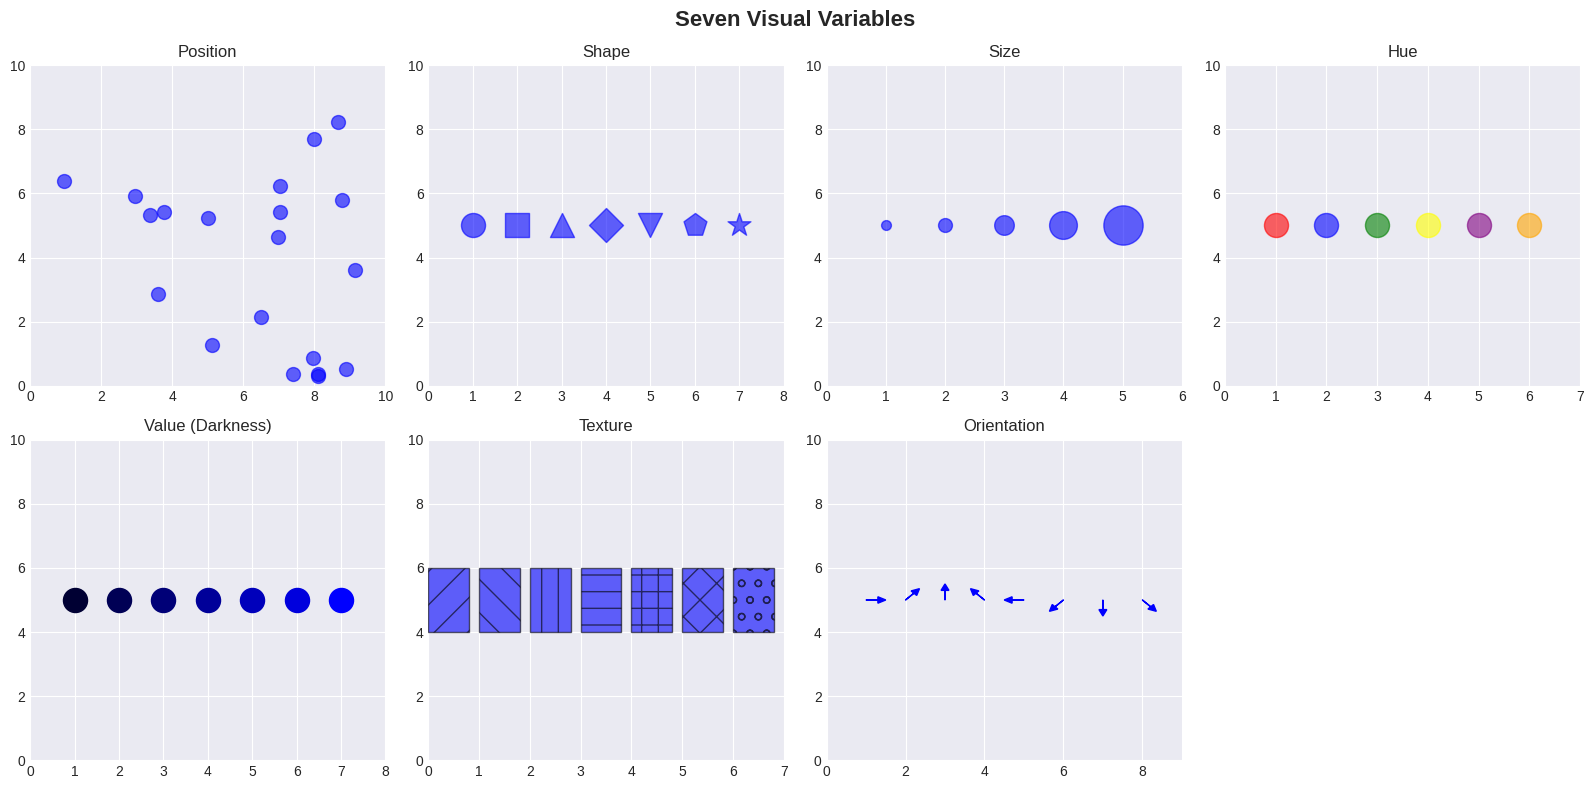

In [ ]:
# 1. Visual variables
fig1 = demo.demonstrate_visual_variables()
fig1.savefig('visual_variables.png', dpi=300, bbox_inches='tight')
print("✓ Visual variables demonstration saved")

✓ Classification methods saved


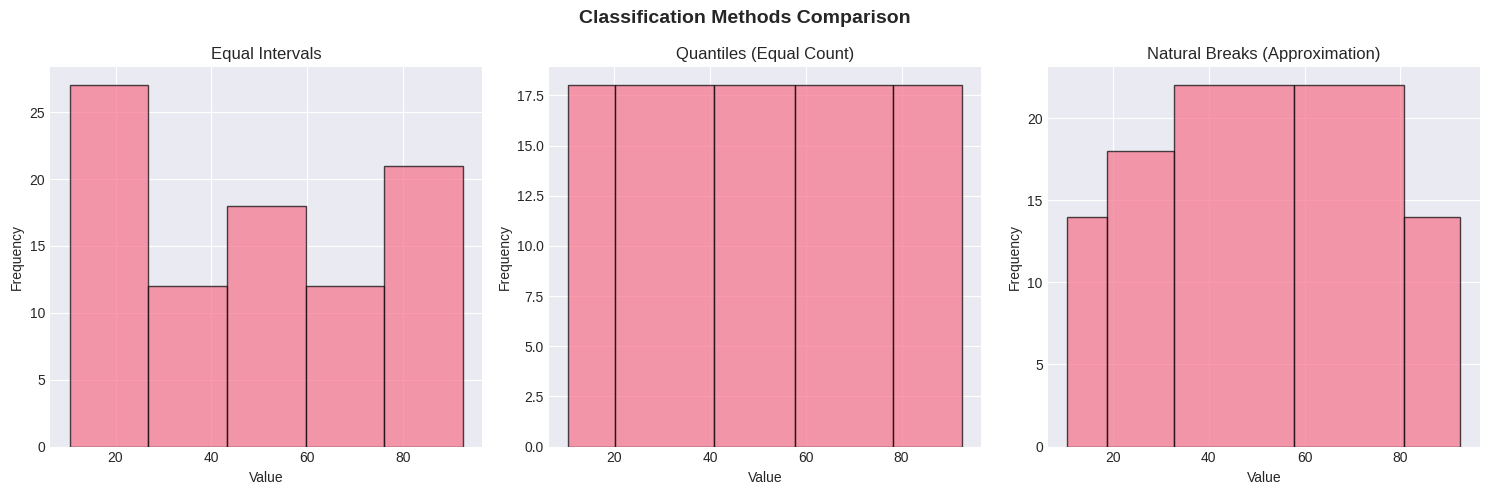

In [ ]:
# 2. Classification methods
fig2, bins_eq, bins_qu, bins_nat = demo.demonstrate_classification_methods()
fig2.savefig('classification_methods.png', dpi=300, bbox_inches='tight')
print("✓ Classification methods saved")

✓ Proportional symbol map saved


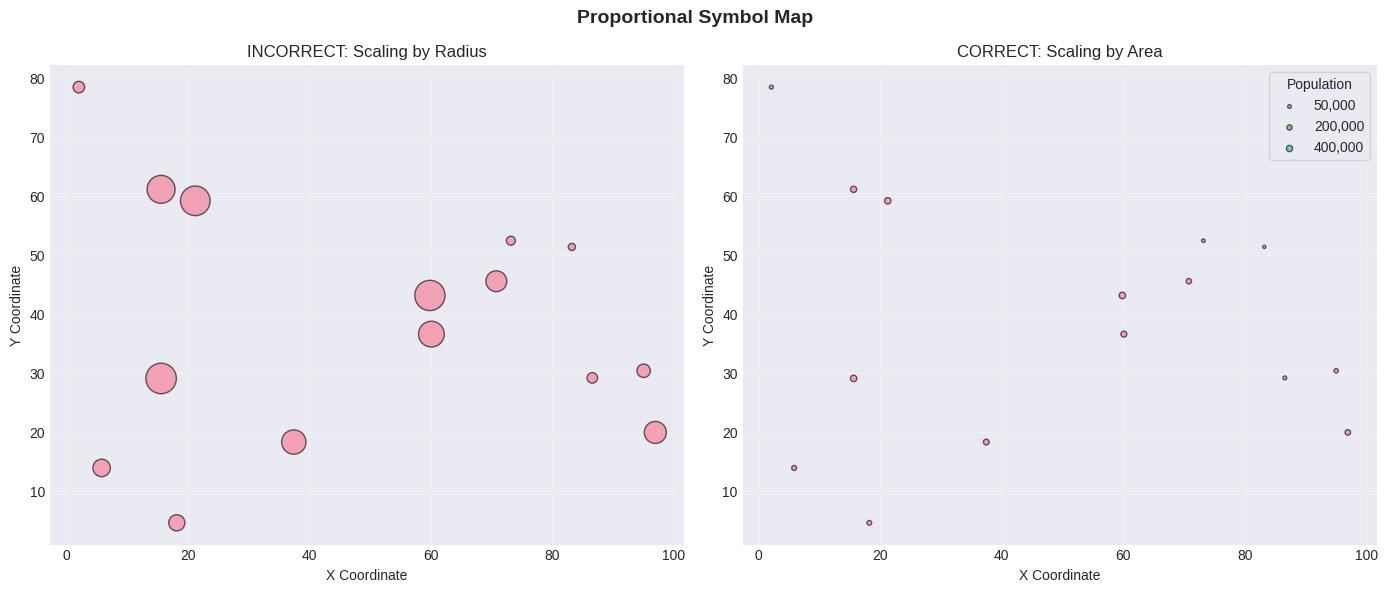

In [ ]:
# 3. Proportional symbols
fig3 = demo.create_proportional_symbol_map()
fig3.savefig('proportional_symbols.png', dpi=300, bbox_inches='tight')
print("✓ Proportional symbol map saved")

✓ Point density map saved


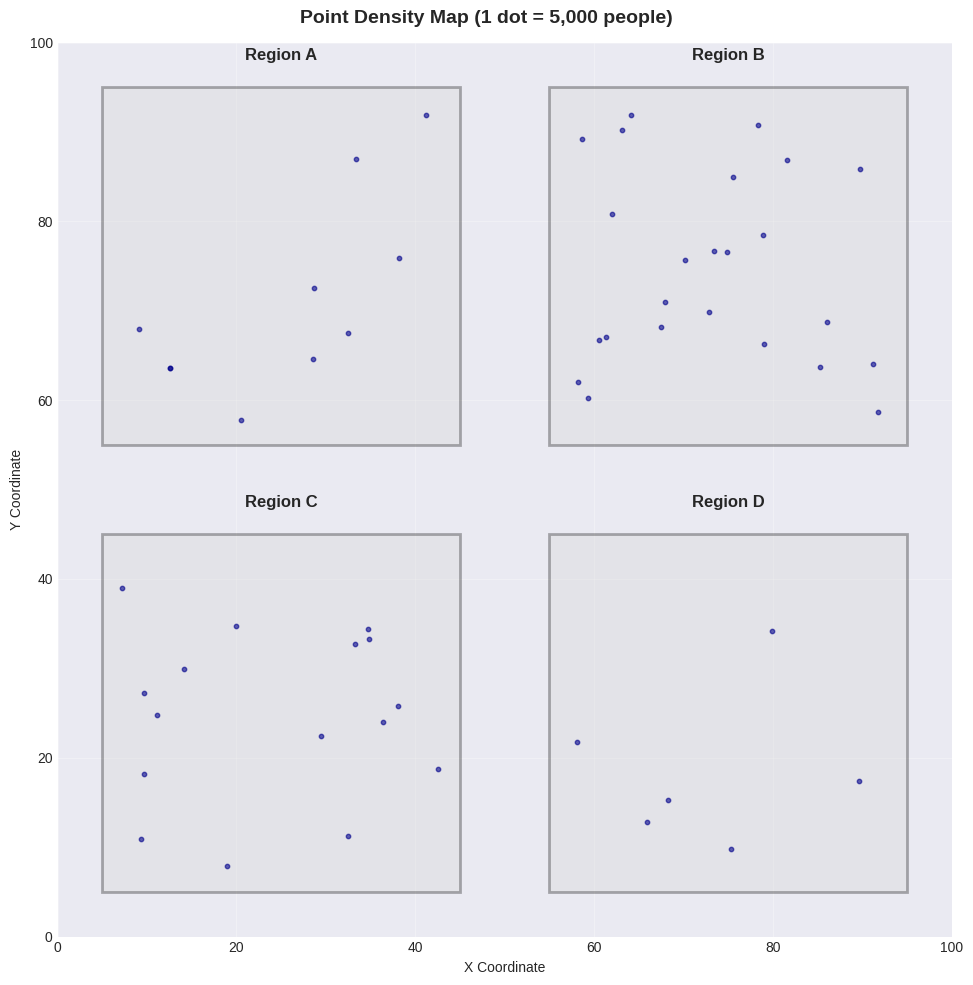

In [ ]:
# 4. Point density
fig4 = demo.create_point_density_map()
fig4.savefig('point_density.png', dpi=300, bbox_inches='tight')
print("✓ Point density map saved")

✓ Isoline map saved


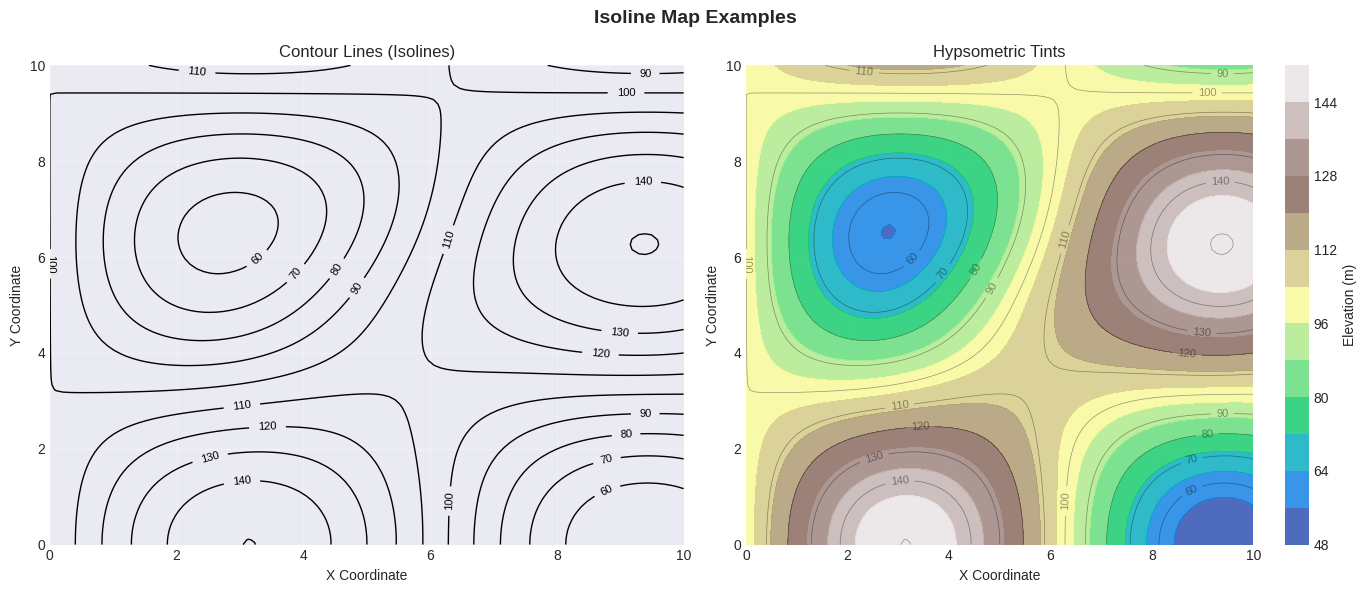

In [ ]:
# 5. Isolines
fig5 = demo.create_isoline_map()
fig5.savefig('isoline_map.png', dpi=300, bbox_inches='tight')
print("✓ Isoline map saved")

✓ Choropleth map saved


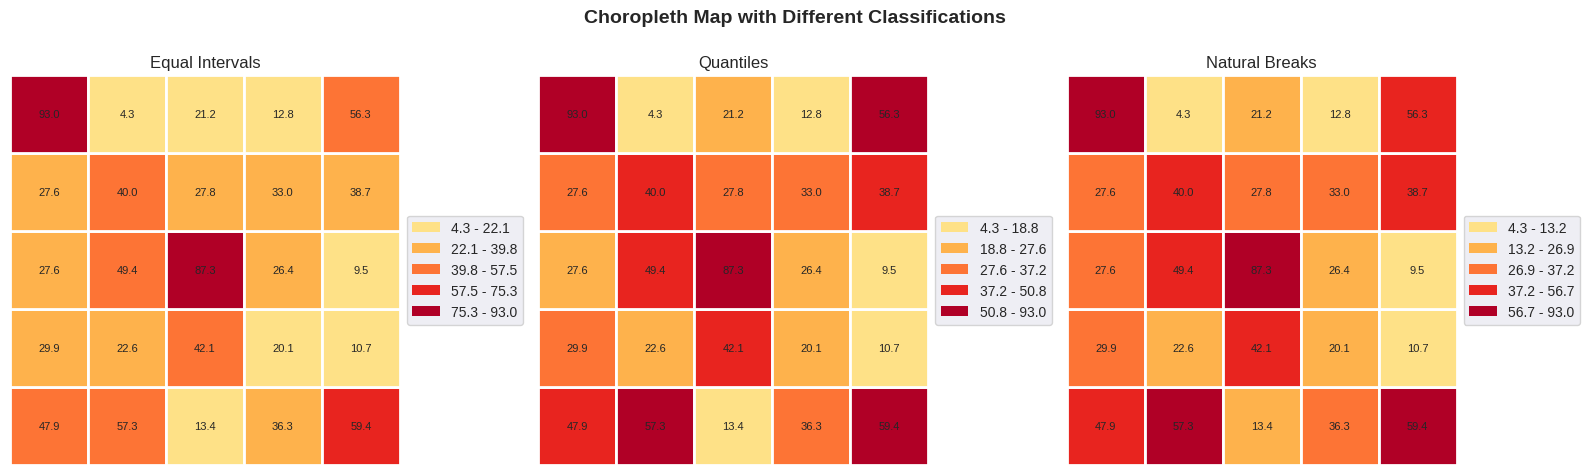

In [ ]:
# 6. Choropleth
fig6 = demo.create_choropleth_map()
fig6.savefig('choropleth_map.png', dpi=300, bbox_inches='tight')
print("✓ Choropleth map saved")

✓ Layer combination saved


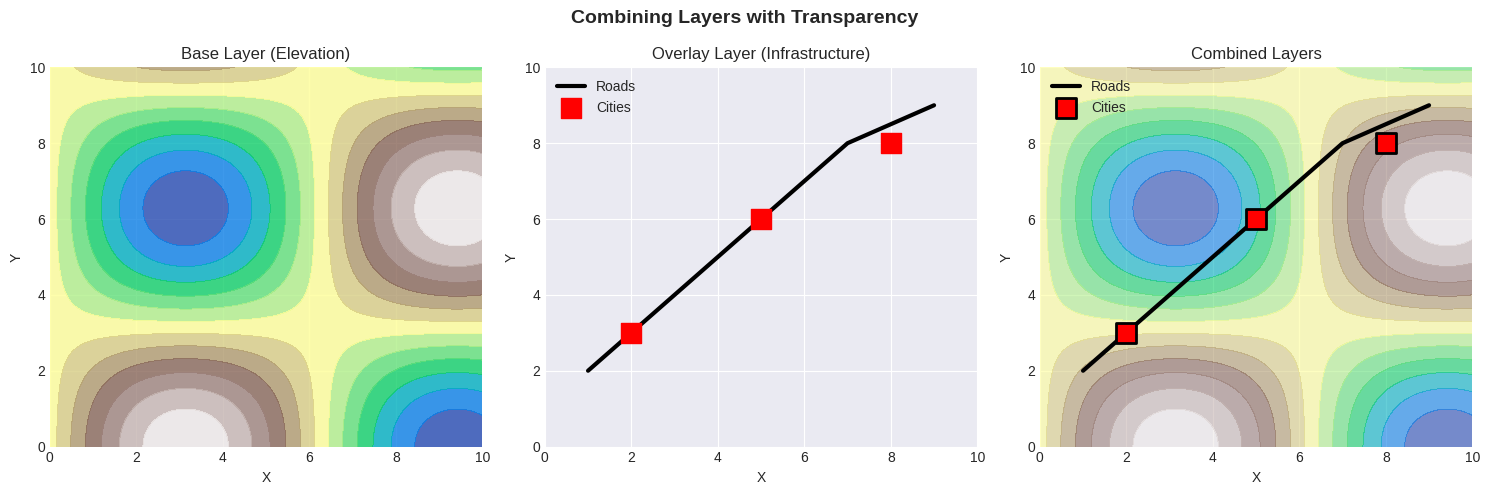

In [ ]:
# 7. Layer combination
fig7 = demo.demonstrate_layer_combination()
fig7.savefig('layer_combination.png', dpi=300, bbox_inches='tight')
print("✓ Layer combination saved")

---
# Spatiotemporal Analysis Case Studies

---

# CASE 1: Cryptocurrency Analysis

---

## General Description

**Context:**
Cryptocurrencies have experienced explosive growth since 2017, with high volatility and variable adoption globally. Investors need to understand temporal price patterns and geographic adoption to make informed decisions.

**Business Problem:**
A retail investor wants to diversify their portfolio by including cryptocurrencies but needs to understand:
- Are they predictable investments or completely random?
- Which regions of the world are adopting crypto most rapidly?
- Can geographic interest predict price movements?

---

## Learning Objectives

### **Time Series:**
1. Identify whether crypto prices are random walks
2. Calculate and analyze returns (daily returns)
3. Analyze ACF of prices vs returns

### **Spatial:**
1. Map global interest in cryptocurrencies (Google Trends)
2. Identify countries with highest adoption
3. Visualize geographic distribution of exchanges

### **Integration:**
1. Correlate geographic interest with volatility
2. Detect if changes in regional adoption predict prices
3. Analyze lead/lag relationships between regions

---

## Datasets

### **1. Cryptocurrency Prices**

**Source:** Yahoo Finance API (free, updated daily)

```python
import yfinance as yf
import pandas as pd
```

**Variables:**
- `Date`: Date (daily)
- `Open`: Opening price
- `High`: Daily maximum price
- `Low`: Daily minimum price
- `Close`: Closing price (primary for analysis)
- `Volume`: Transaction volume

---

### **2. Geographic Interest (Google Trends)**

**Source:** PyTrends API (Google Trends)

```python
from pytrends.request import TrendReq
import time

# Configure API
pytrends = TrendReq(hl='en-US', tz=360)

# Search by country
keywords = ['Bitcoin', 'Ethereum', 'Cryptocurrency']
countries = ['US', 'MX', 'BR', 'CN', 'JP', 'DE', 'GB', 'IN', 'KR', 'SG']
```

**Variables:**
- `date`: Date (weekly)
- `country`: Country code (ISO 2)
- `keyword`: Search term
- `interest`: Interest index (0-100)

---

### **3. Geographic Data of Countries**

```python
import geopandas as gpd

# Download country shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Add capital coordinates for point maps
capitals = {
    'United States': (-77.0369, 38.9072),
    'Mexico': (-99.1332, 19.4326),
    'Brazil': (-47.8825, -15.7975),
    'China': (116.4074, 39.9042),
    'Japan': (139.6917, 35.6895),
    'Germany': (13.4050, 52.5200),
    'United Kingdom': (-0.1278, 51.5074),
    'India': (77.2090, 28.6139),
    'South Korea': (126.9780, 37.5665),
    'Singapore': (103.8198, 1.3521)
}
```

---

## Suggested Analyses

### **Part 1: Time Series Analysis**

#### **1.1 Random Walk Test**
#### **1.2 ACF Analysis**

**Expected observations:**
- Prices: Very high ACF, decays slowly → Random Walk
- Returns: ACF ≈ 0 → No autocorrelation
- Returns²: Significant ACF → Volatility clustering

#### **1.3 Volatility and Clustering**

---
### **Part 2: Spatial Analysis**

#### **2.1 Choropleth Map: Global Interest**

```python
import plotly.express as px
```

#### **2.2 Time Series by Region**

```python
import seaborn as sns
```
---

### **Part 3: Spatiotemporal Integration**

#### **3.1 Correlation: Geographic Interest vs Volatility**
#### **3.2 Lead/Lag Analysis (CCF)**

**Interpretation:**
- Negative lag: Interest predicts volatility
- Positive lag: Volatility predicts interest
- Lag ≈ 0: Contemporaneous relationship

---

## Storytelling Framework

### **WHO (Audience)**
**Primary:** Retail investor (25-40 years old, medium technical knowledge)  
**Secondary:** Financial advisors, market analysts

### **WHAT (Desired Action)**
1. Decide whether to include cryptocurrencies in portfolio
2. Understand risk level (volatility)
3. Identify early adoption signals

### **HOW (Data as Evidence)**
- Time Series: Demonstrate that prices are random walks (high uncertainty)
- Volatility Clustering: High volatility periods are persistent
- Geographic Interest: Global adoption growing but uneven
- Lead/Lag: Public interest may be a leading indicator

---

## Required Visualizations

### **Minimum Deliverables:**

1. **Temporal:**
   - Line chart: Prices of 3+ cryptos
   - ACF plots: Prices vs Returns
   - Volatility chart with marked events

2. **Spatial:**
   - Choropleth map: Global interest
   - Bar chart: Top 10 countries
   - Faceted time series by region

3. **Integration:**
   - Dual-axis plot: Volatility vs Interest
   - CCF plot with interpretation
   - Heatmap: Correlation between countries

4. **Dashboard:**
   - Interactive Plotly dashboard with filters
   - Tabs: Overview / Time Series / Geographic / Insights

---

## Guiding Questions

### **Time Series:**
1. Are crypto prices random walks? What does this imply for investing?
2. Why do returns² have autocorrelation but returns don't?
3. What is volatility clustering and why does it matter?

### **Spatial:**
4. Which countries lead adoption? Why?
5. Are there differences between developed and emerging countries?

### **Integration:**
6. Does geographic interest predict price movements?
7. Is there a "leader" country whose interest predicts global adoption?
8. How would you use this information for investing?
